# <center>MDI341: TP Graphs</center>

In [11]:
import numpy as np
import random
import networkx as nx
from IPython.display import Image
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
import os.path
import urllib
import tarfile
from collections import Counter

**Note** : la documentation de NetworkX se trouve [ici](http://networkx.readthedocs.io/)

## Analyse de graphes

### Graphes aléatoires : Erdős-Rényi

#### Question 1

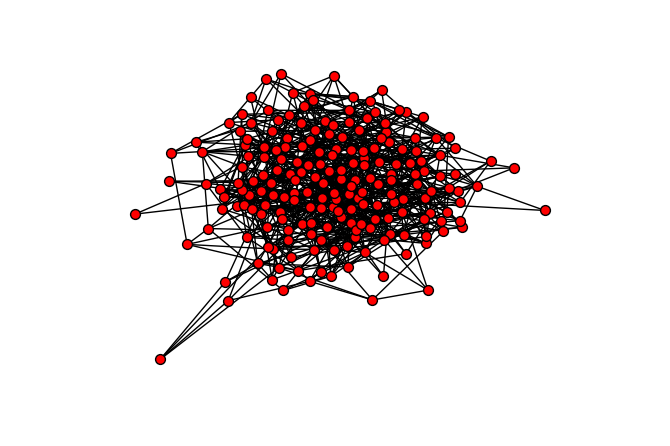

In [11]:
n = 200
p = 0.04
G_erdos = nx.erdos_renyi_graph(n,p)
nx.draw(G_erdos, node_size=50)

#### Question 2

In [29]:
print("Number of nodes :", G_erdos.number_of_nodes())
print("Number of edges :", G_erdos.number_of_edges())
print("Number of neighbours for node 0 :", G_erdos.neighbors(0))

Number of nodes : 200
Number of edges : 779
Number of neighbours for node 0 : [179, 149, 158, 40, 74, 140, 154, 14]


In [73]:
degrees = sorted(G_erdos.degree().values())
minDeg, maxDeg, mediumDeg, avgDeg = min(degrees), max(degrees), degrees[int(len(degrees)/2)], sum(degrees)/len(degrees)
print("minDeg :", minDeg, "| maxDeg :", maxDeg, "| mediumDeg :", mediumDeg, "| avgDeg :", avgDeg)

minDeg : 2 | maxDeg : 15 | mediumDeg : 8 | avgDeg : 7.79


L'espérance du degré est n \* p = 200 \* 0.04 = 8. <br> La valeur moyenne empirique ici trouvée est identique.

#### Question 3

[0, 0, 2, 4, 15, 18, 26, 27, 32, 29, 21, 9, 6, 7, 2, 2]
le degré maximum est bien : 15


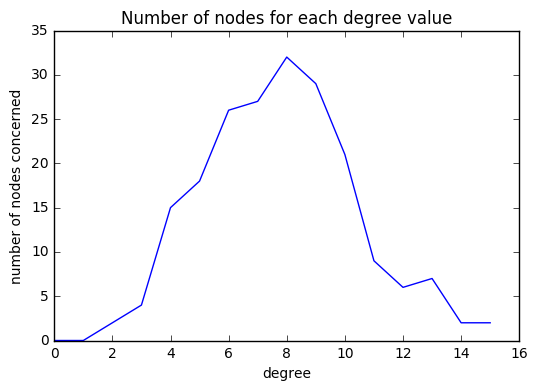

In [103]:
deg_hist = nx.degree_histogram(G_erdos)
print(deg_hist)
print("le degré maximum est bien :", len(deg_hist) - 1)

plt.plot(deg_hist)
plt.title("Number of nodes for each degree value")
plt.xlabel("degree")
plt.ylabel("number of nodes concerned")

La courbe est bien centrée autour de la moyenne, comme attendue pour une distribution du modèle Erdös-Rényi.<br>
Erdös s'appuyant sur des données aléatoires i.i.d., le comportement est proche de celui d'une loi binomiale.

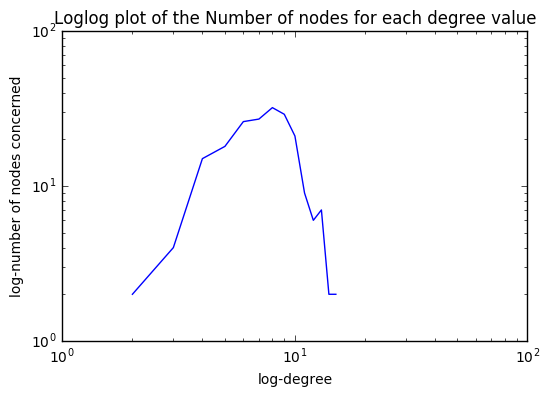

In [106]:
plt.loglog(deg_hist)
plt.title("Loglog plot of the Number of nodes for each degree value")
plt.xlabel("log-degree")
plt.ylabel("log-number of nodes concerned")

De la même façon, on s'attendait à ne pas avoir une courbe linéaire pour le graphe log-log, car cela est caractéristique du modèle Barabasi-Albert.

#### Question 4

In [118]:
# the global clustering coefficient is computed through all local clustering coefficients given by nx.clustering().
localClustCoef = nx.clustering(G_erdos)
print("global clustering coefficient :", sum(localClustCoef.values())/len(localClustCoef.values()))

global clustering coefficient : 0.030291847041847


L'espérance de cette valeur est p = 0.04<br>
L'espérance du coefficient du clustering est relativement proche de sa valeur moyenne.

#### Question 5

In [134]:
# Peut-on parler d’effet “petit monde” pour ce graphe ?

print("The diameter (= longest shortest path = the maximum eccentricity) is :", nx.diameter(G_erdos))
print("The average length of shortest paths is :", round(nx.average_shortest_path_length(G_erdos), 1))


The diameter (= longest shortest path = the maximum eccentricity) is : 5
The average length of shortest paths is : 2.8


L'effet petit monde calcule le lien le plus petit unissant n'importe quels noeuds du graphe.<br>
La longueur d'un chemin est le nombre d'arrêtes liant les noeuds.<br>
Le diamètre étant de 5, le plus petit chemin moyen étant de 2,8, on peut parler d'effet petit monde dans ce réseau.<br>
<u>A noter</u> : la valeur du coefficient de clustering n'est pas la meilleure métrique pour mesurer cet effet.

### Graphes aléatoires : Barabási–Albert

#### Question 6

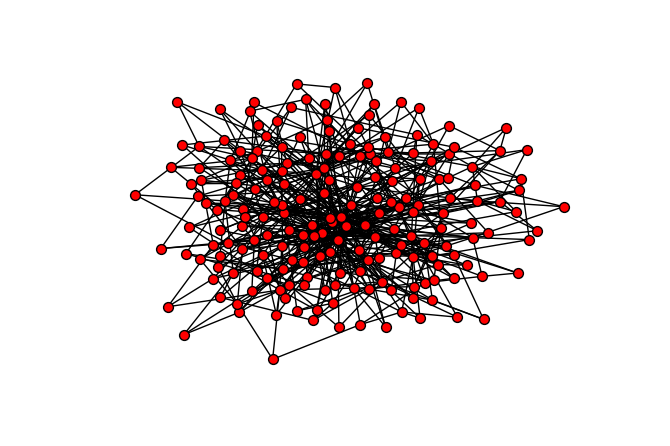

In [136]:
n = 200
m = 3
# m donne le nombre de noeuds auquel est connecté chaque nouveau noeud
G_barabasi = nx.barabasi_albert_graph(n,m)
nx.draw(G_barabasi, node_size=50)

In [137]:
print("Number of nodes :", G_barabasi.number_of_nodes())
print("Number of edges :", G_barabasi.number_of_edges())
print("Number of neighbours for node 0 :", G_barabasi.neighbors(0))

Number of nodes : 200
Number of edges : 591
Number of neighbours for node 0 : [144, 3, 4, 6, 7, 41, 140, 77, 15, 16, 50, 119, 61]


In [138]:
degrees = sorted(G_barabasi.degree().values())
minDeg, maxDeg, mediumDeg, avgDeg = min(degrees), max(degrees), degrees[int(len(degrees)/2)], sum(degrees)/len(degrees)
print("minDeg :", minDeg, "| maxDeg :", maxDeg, "| mediumDeg :", mediumDeg, "| avgDeg :", avgDeg)

minDeg : 3 | maxDeg : 45 | mediumDeg : 4 | avgDeg : 5.91


[0, 0, 0, 77, 31, 31, 14, 7, 9, 9, 3, 3, 1, 2, 3, 3, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1]
le degré maximum est bien : 45


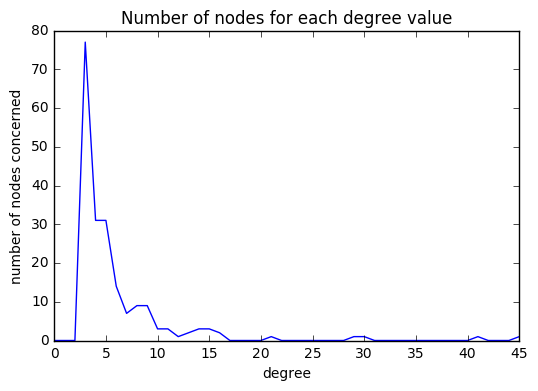

In [139]:
deg_hist = nx.degree_histogram(G_barabasi)
print(deg_hist)
print("le degré maximum est bien :", len(deg_hist) - 1)

plt.plot(deg_hist)
plt.title("Number of nodes for each degree value")
plt.xlabel("degree")
plt.ylabel("number of nodes concerned")

Comme on pouvait s'y attendre sur un modèle Barabasi-Albert, les extrèmes sont accentués :<br>
moins un noeud a de voisins, moins il en aura.<br>
plus il en a, plus il en aura.

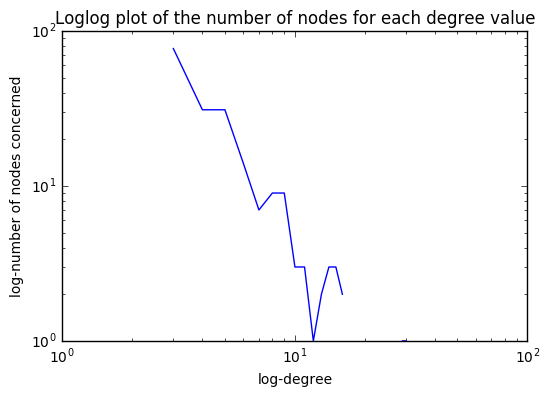

In [141]:
plt.loglog(deg_hist)
plt.title("Loglog plot of the number of nodes for each degree value")
plt.xlabel("log-degree")
plt.ylabel("log-number of nodes concerned")

Le résultat de la courbe loglog s'approche de la droite oblique qu'on attendait pour ce type de modèle.

In [142]:
# the global clustering coefficient is computed through all local clustering coefficients given by nx.clustering().
localClustCoef = nx.clustering(G_barabasi)
print("global clustering coefficient :", sum(localClustCoef.values())/len(localClustCoef.values()))

global clustering coefficient : 0.0897775381099603


Le coefficient de clustering est supérieur à celui du modèle Erdös–Rényi.

In [143]:
# Peut-on parler d’effet “petit monde” pour ce graphe ?

print("The diameter (= longest shortest path = the maximum eccentricity) is :", nx.diameter(G_barabasi))
print("The average length of shortest paths is :", round(nx.average_shortest_path_length(G_barabasi), 1))


The diameter (= longest shortest path = the maximum eccentricity) is : 5
The average length of shortest paths is : 2.9


Le diamètre et la longueur moyenne des plus petits chemins sont faibles.<br>
On peut donc parler d'effet petit monde.

## Graphe Karate Club

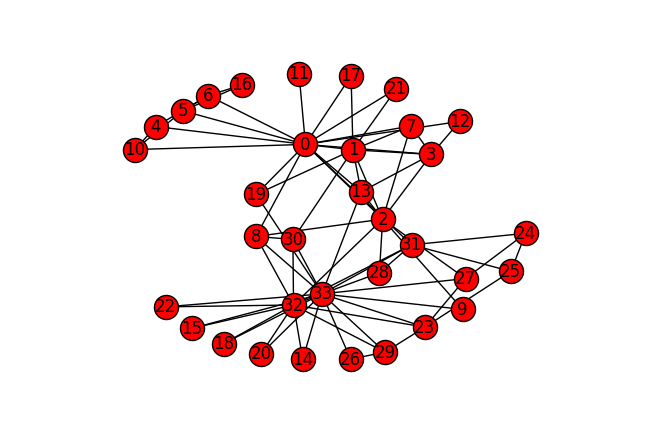

In [144]:
n=34
G_karate = nx.karate_club_graph()

# on définit une position des noeuds qui peut être ré-utilisée plusieurs fois
# en appelant la fonction nx.draw avec l'option pos=pos
pos = nx.spring_layout(G_karate)
nx.draw(G_karate, cmap = plt.get_cmap('rainbow'), with_labels=True, pos=pos)

#### Question 7

In [150]:
from time import time

# le code suivant calcule une matrice de taille n x n
# distances[i, j] contient la longueur du plus court chemin entre les noeuds i et j
pcc_longueurs = nx.all_pairs_shortest_path_length(G_karate)
distances = np.zeros((n,n))

# AgglomerativeClustering effectue un clustering hiérarchique du graphe

for i in range(n):
    for j in range(n):
        distances[i, j] = pcc_longueurs[i][j]

clustering2 = AgglomerativeClustering(linkage='average', affinity='precomputed', n_clusters=2)

t0 = time()
clustering2.fit(distances)
print("%.2fs" % (time() - t0))

0.00s


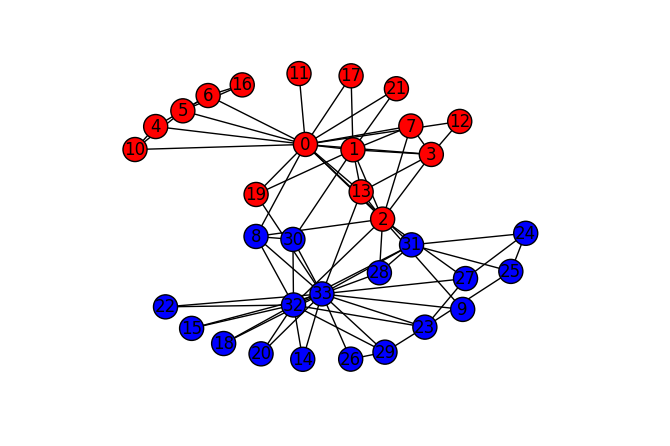

In [160]:
nx.draw(G_karate, cmap = plt.get_cmap('bwr'), node_color = clustering2.labels_, with_labels=True, node_size=300, pos=pos)

In [161]:
clustering4 = AgglomerativeClustering(linkage='average', affinity='precomputed', n_clusters=4)

t0 = time()
clustering4.fit(distances)
print("%.2fs" % (time() - t0))

0.00s


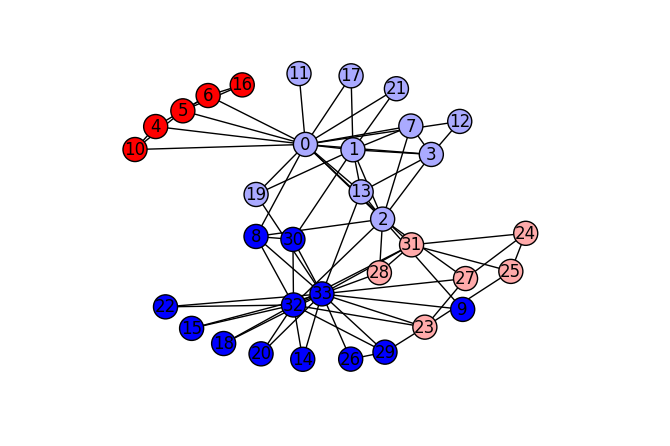

In [162]:
nx.draw(G_karate, cmap = plt.get_cmap('bwr'), node_color = clustering4.labels_, with_labels=True, node_size=300, pos=pos)

#### Question 8

On va mettre en évidence visuellement les différences entre quelques mesures de centralité des noeuds

In [166]:
print("Liste des classes de chaque noeud :", clustering4.labels_)

Liste des classes de chaque noeud : [1 1 1 1 3 3 3 1 0 0 3 1 1 1 0 0 3 1 0 1 0 1 0 2 2 2 0 2 2 0 0 2 0 0]


In [174]:
print("Degrés de G_karate :\n", list(G_karate.degree().values()))

Degrés de G_karate :
 [16, 9, 10, 6, 3, 4, 4, 4, 5, 2, 3, 1, 2, 5, 2, 2, 2, 2, 2, 3, 2, 2, 2, 5, 3, 3, 2, 4, 3, 4, 4, 6, 12, 17]


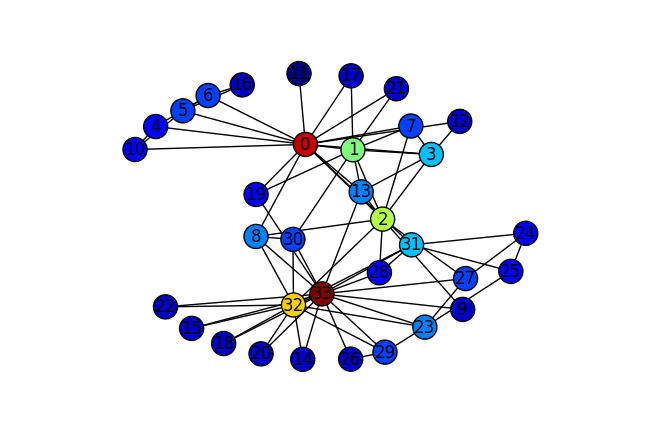

In [176]:

# conseil: utiliser l'option cmap = plt.get_cmap('jet') de nx.draw
# les couleurs iront du bleu foncé (peu central) au rouge foncé (très central)

#degree

nx.draw(G_karate, cmap = plt.get_cmap('jet'), node_color = list(G_karate.degree().values()), with_labels=True, node_size=300, pos=pos)


In [188]:
#eigenvector

# number of walks of infinite length ending at node i
# More importance given to nodes with well-connected neighbors
# ==>>> Plus la centralité des vecteurs propres 
print("10 first eigenvectors :\n", list(nx.eigenvector_centrality(G_karate).values())[:10])

10 first eigenvectors :
 [0.35549072112370417, 0.2659596047878132, 0.31719241726880987, 0.21117969364646638, 0.07596887866870569, 0.07948311304096012, 0.07948311304096012, 0.17095989227092295, 0.2274043553316273, 0.10267450362144723]


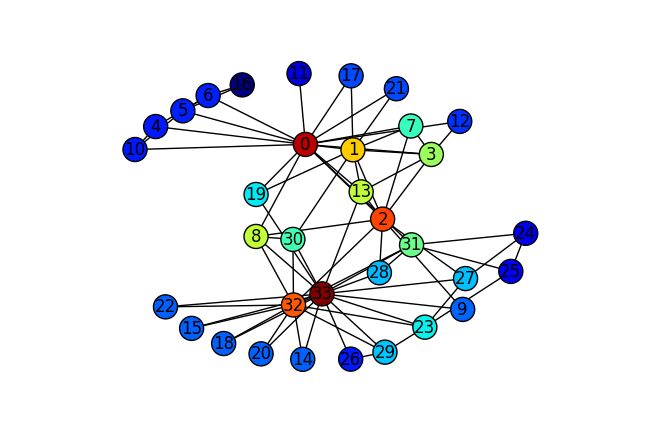

In [189]:
nx.draw(G_karate, cmap = plt.get_cmap('jet'), node_color = list(nx.eigenvector_centrality(G_karate).values()), with_labels=True, node_size=300, pos=pos)

In [191]:
#closeness

# this metric is inversely proportional to the sum of lengths of the shortest paths to other nodes
# ==>>> Plus la closeness est grande, plus les chemins partant du noeuds sont longs en "cumulé"
print("10 closest values :\n", list(nx.closeness_centrality(G_karate).values())[:10])


10 closest values :
 [0.5689655172413793, 0.4852941176470588, 0.559322033898305, 0.4647887323943662, 0.3793103448275862, 0.38372093023255816, 0.38372093023255816, 0.44, 0.515625, 0.4342105263157895]


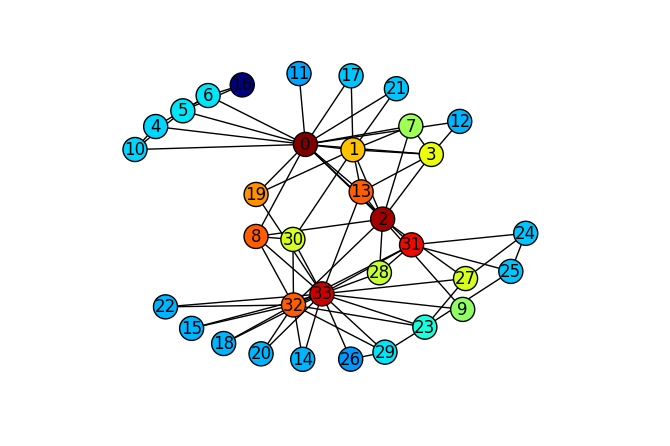

In [192]:
nx.draw(G_karate, cmap = plt.get_cmap('jet'), node_color = list(nx.closeness_centrality(G_karate).values()), with_labels=True, node_size=300, pos=pos)

In [196]:
#betweenness

# number of times the node acts as a “bridge” between two nodes

print("10 closest values :\n", list(nx.betweenness_centrality(G_karate).values())[:10])

10 closest values :
 [0.4376352813852815, 0.053936688311688304, 0.14365680615680618, 0.011909271284271283, 0.0006313131313131313, 0.02998737373737374, 0.029987373737373736, 0.0, 0.05592682780182781, 0.0008477633477633478]


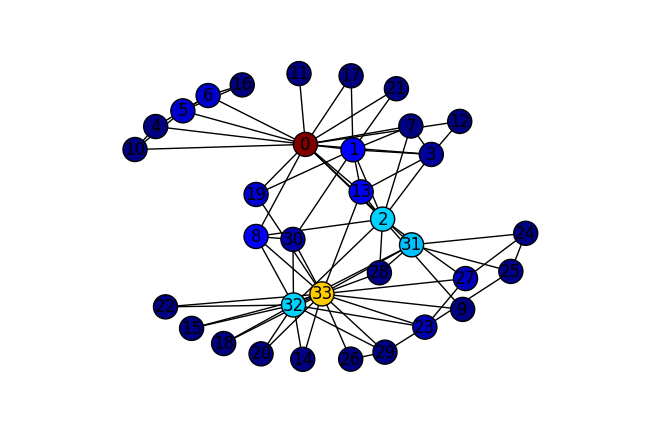

In [194]:
nx.draw(G_karate, cmap = plt.get_cmap('jet'), node_color = list(nx.betweenness_centrality(G_karate).values()), with_labels=True, node_size=300, pos=pos)

Comparatif des 4 mesures de centralité présentées :
- <u>la mesure "Betweeness", ou "centralité d'intermédiarité"</u> : elle compte le nombre de plus courts chemins passant par un sommet donné. Donc seul un noeud a une valeur importante.
- <u>la centralité par degrés</u> : cette mesure favorise les noeuds ayant un degré élevé or dans ce graphe on voit que la distribution des degrés des noeuds décroit trés rapidement et donc les nombreux noeuds ayant un degré faible ont une mesure de centralité faible
- <u>la centralité par valeurs propres</u> : elle renforce un noyeau de noeuds centraux, puisque elle favorise la connexion à des noeuds déjà fortement connectés. C'est ce qui explique les valeurs de centralité plus élevées que dans les mesures précédentes
- <u>la mesure de proximité</u> : c'est la plus flexible, du fait que seuls quelques noeuds sont très faiblement connectés (degré 1 ou 2) ce qui n'augmente pas trop  la longueur des chemins les plus courts (dénominateur de la mesure) en moyenne

### Graphe des produits Amazon

#### Question 9 (bonus +2 pts)

In [12]:
import urllib.request
if os.path.exists('amazon.txt.gz') is False:
    resp = urllib.request.urlretrieve('https://snap.stanford.edu/data/bigdata/' +
                              'communities/com-amazon.ungraph.txt.gz', 'amazon.txt.gz')

G_amazon = nx.read_edgelist('amazon.txt.gz')

In [13]:
print("Nombre de noeuds : ", G_amazon.number_of_nodes(), "\nNombre d'arêtes : ", G_amazon.number_of_edges())
list_deg = sorted(list(G_amazon.degree().values()))
print("Degré minimum : ", np.min(list_deg), "Degré maximum : ",np.max(list_deg))
print("Degré médian : ", list_deg[int(len(list_deg)/2)] + list_deg[int(len(list_deg)/2)] / 2)
print("Degré moyen : ", np.mean(list_deg))

Nombre de noeuds :  334863 
Nombre d'arêtes :  925872
Degré minimum :  1 Degré maximum :  549
Degré médian :  6.0
Degré moyen :  5.52985549314


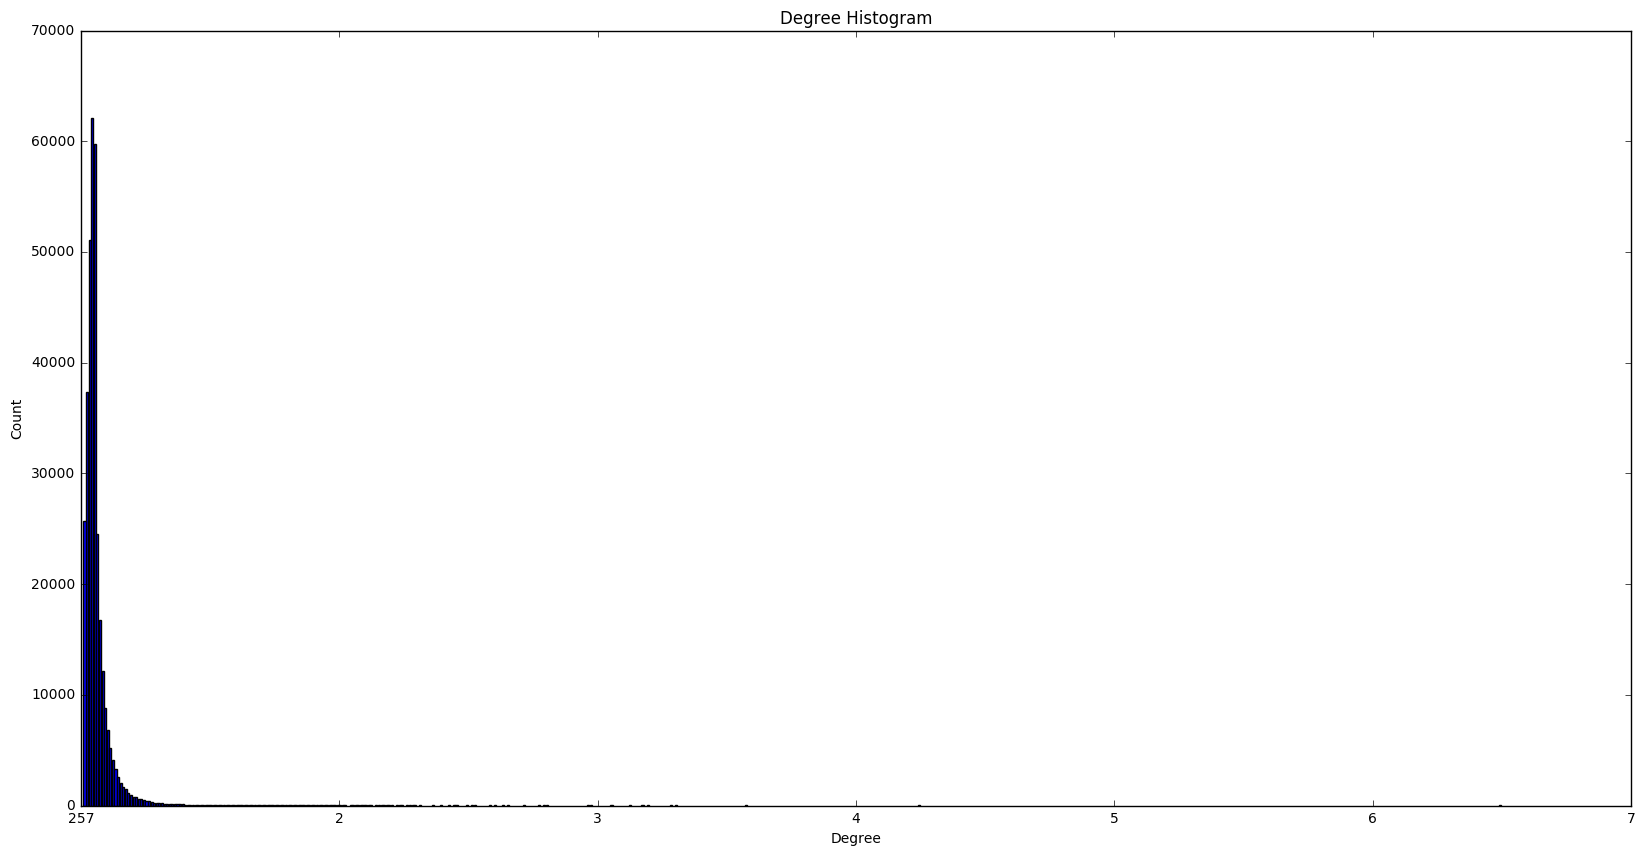

In [14]:
########### Echelle normale #####################################
nx.degree_histogram(G=G_amazon)
degree_sequence=sorted(nx.degree(G_amazon).values(),reverse=True)
degreeCount= Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
fig, ax = plt.subplots(figsize=(20,10))
plt.bar(deg, cnt, color='b')
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticklabels(deg)

On voit que la distribution des degrées decroît très rapidement en représentation normale.

In [15]:
print("Coefficient de clustering global : ", nx.average_clustering(G_amazon))

Coefficient de clustering global :  0.3967463932787489


Le graph est beaucoup plus concentré que les graphes aléatoires étudiés précédemment

In [16]:
## Attention très long ####

#print("Chemin le plus court moyen : ", nx.average_shortest_path_length(G_amazon))
#print("Diamètre du graph : ", nx.diameter(G_amazon))
#dist = [c for path in nx.shortest_path_length(G_amazon).values() for c in path.values()]
#plt.hist(dist)

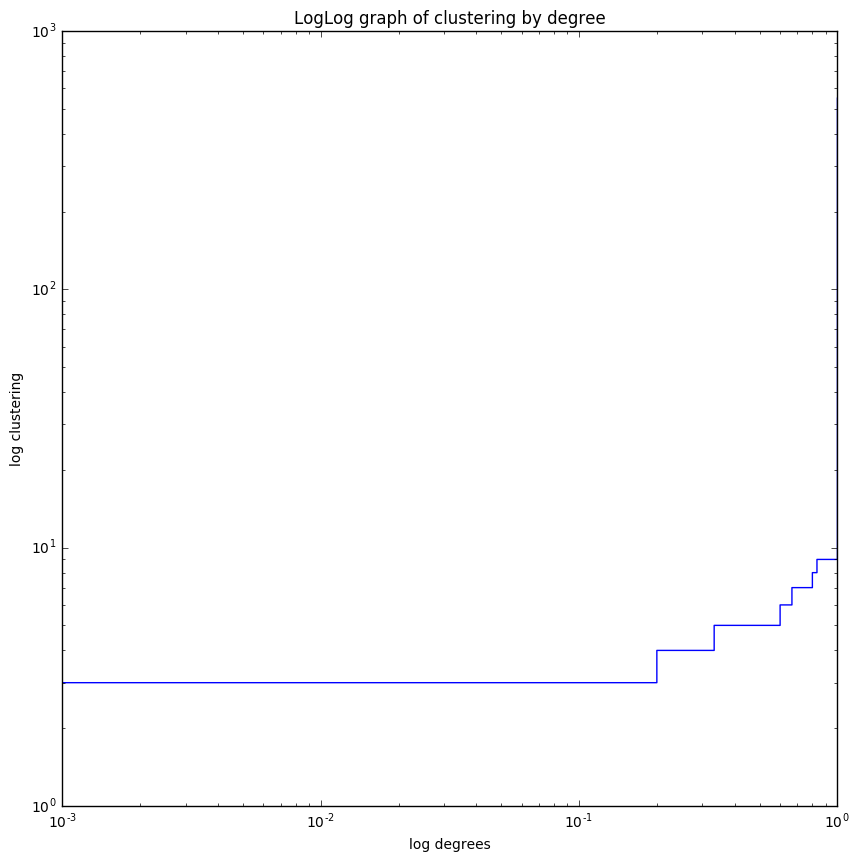

In [17]:
clusterings = sorted(nx.clustering(G_amazon).values(), reverse=False)
degrees = sorted(nx.degree(G_amazon).values(), reverse=False)
fig, ax = plt.subplots(figsize=(10, 10))
plt.loglog(clusterings, degrees)
plt.title("LogLog graph of clustering by degree")
plt.ylabel("log clustering")
plt.xlabel("log degrees")
ax.set_xscale("log")
ax.set_yscale("log")

Nous voyons sur ce graph que plus le degré est elevé, plus la concentration est elevée.

## Prédiction dans les graphes

Nombre de noeuds: 150
Nombre d'arêtes: 1693
Nombre de composantes connexes: 2


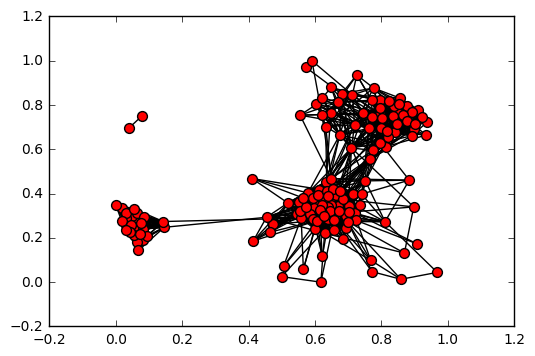

In [2]:
if os.path.exists('facebook.tar.gz') is False:
    resp = urllib.request.urlretrieve('https://snap.stanford.edu/data/facebook.tar.gz',
                              'facebook.tar.gz')
    tarfile.open("facebook.tar.gz", 'r:gz').extractall('.')

G_fb = nx.read_edgelist("facebook/414.edges")
n = G_fb.number_of_nodes()
m = G_fb.number_of_edges()
# on renumérote les noeuds de 0 à n-1
mapping=dict(zip(G_fb.nodes(), range(n)))
nx.relabel_nodes(G_fb, mapping, copy=False)
pos = nx.spring_layout(G_fb)
nx.draw_networkx(G_fb, node_size=50, title = "EGO NETWORK", with_labels=False, pos=pos)
print("Nombre de noeuds: %d" % n)
print("Nombre d'arêtes: %d" % m)
print("Nombre de composantes connexes: %d" % nx.number_connected_components(G_fb))

#### Question 10

In [3]:
# G_fb_train est une copie du graphe original
# auquel on a retiré 20% des arêtes choisies aléatoirement

proportion_edges = 0.2
edge_subset = random.sample(G_fb.edges(),
                            int(proportion_edges * G_fb.number_of_edges()))
G_fb_train = G_fb.copy()
G_fb_train.remove_edges_from(edge_subset)

edge_subset_size = len(list(edge_subset))
print("Nombre d'arêtes retirées: %d" % edge_subset_size)
print("Nombre d'arêtes restantes: %d" % (m - edge_subset_size))
print("Nombre total d'arêtes non-existantes: %d" %
      len(list(nx.non_edges(G_fb_train))))

Nombre d'arêtes retirées: 338
Nombre d'arêtes restantes: 1355
Nombre total d'arêtes non-existantes: 9820


On veut scorer les arêtes non-existantes de façon à ce que les arêtes réelles retirées aient un plus grand score. On utilise plusieurs mesures de similarité entre paires de noeud et on calcule l'Aire sous la Courbe ROC (AUC). On trace également les courbes ROC pour chaque similarité.

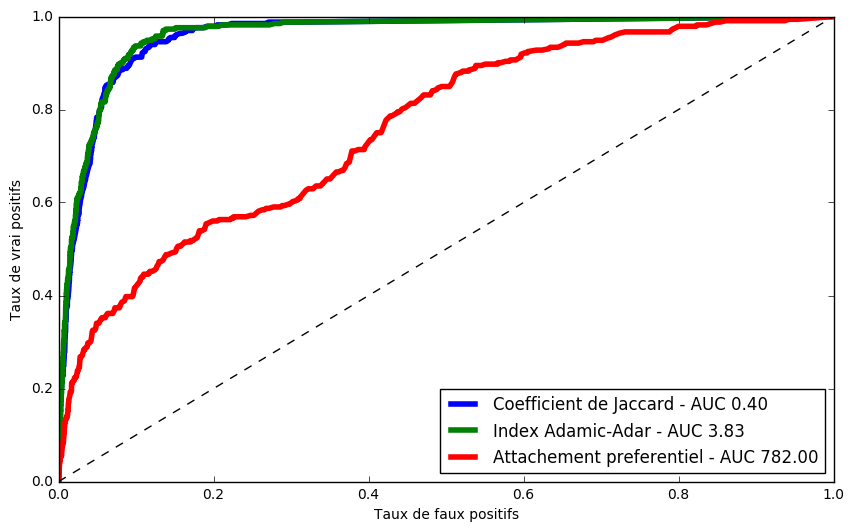

In [4]:
pred_jaccard = list(nx.jaccard_coefficient(G_fb_train))
score_jaccard, label_jaccard = zip(*[(s, (u,v) in edge_subset) for (u,v,s) in pred_jaccard])
non_edges = list(nx.non_edges(G_fb_train))
jac_coef_non_exist = list(nx.jaccard_coefficient(G_fb_train, non_edges))
ada_coef_non_exist = list(nx.adamic_adar_index(G_fb_train, non_edges))
pref_coef_non_exist = list(nx.preferential_attachment(G_fb_train, non_edges))

y_true = []
y_pred_jac = []
y_pred_ada = []
y_pred_pref = []


for i in range(len(non_edges)):
    u, v, c_j = jac_coef_non_exist[i]
    _, _, c_a = ada_coef_non_exist[i]
    _, _, c_p = pref_coef_non_exist[i]
    y_true.append(1 if (u,v) in edge_subset else 0)
    y_pred_jac.append(c_j)
    y_pred_ada.append(c_a)
    y_pred_pref.append(c_p)


fpr_jaccard, tpr_jaccard, _ = metrics.roc_curve(y_true, y_pred_jac)
auc_jaccard = metrics.auc(y_true, y_pred_jac, reorder=True)
fpr_adamic, tpr_adamic, _ = metrics.roc_curve(y_true, y_pred_ada)
auc_adamic = metrics.auc(y_true, y_pred_ada, reorder=True)
fpr_pref, tpr_pref, _ = metrics.roc_curve(y_true, y_pred_pref)
auc_pref = metrics.auc(y_true, y_pred_pref, reorder=True)

# afficher ROC curve et AUC
plt.figure(figsize=(10, 6))
plt.plot(fpr_jaccard, tpr_jaccard, label='Coefficient de Jaccard - AUC %.2f' % auc_jaccard, linewidth=4)
plt.plot(fpr_adamic, tpr_adamic, label='Index Adamic-Adar - AUC %.2f' % auc_adamic, linewidth=4)
plt.plot(fpr_pref, tpr_pref, label='Attachement preferentiel - AUC %.2f' % auc_pref, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrai positifs')
plt.legend(loc='lower right')

Le coefficient de Jaccard et l'index Adamic-Adar sont des meilleurs prédicteurs que le coefficient d'attachement préferentiel

#### Question 11

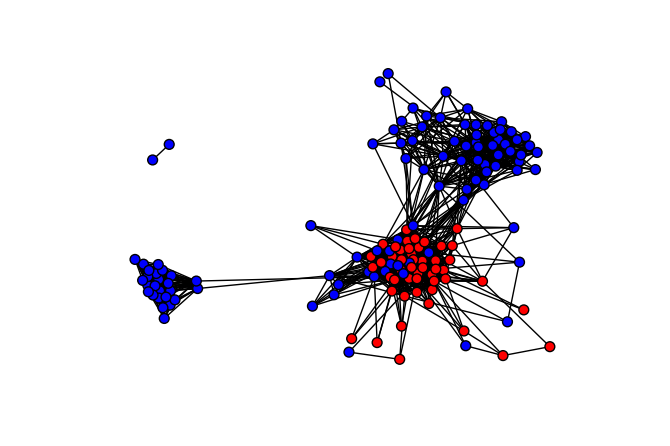

In [6]:
# on charge les labels des noeuds et on les affiche

with open('facebook/414.featnames') as f:
    for i, l in enumerate(f):
        pass

n_feat = i+1

features = np.zeros((n, n_feat))
f = open('facebook/414.feat', 'r')
for line in f:
    if line.split()[0] in mapping:
        node_id = mapping[line.split()[0]]
        features[node_id, :] = list(map(int, line.split()[1:]))

features = 2*features-1
feat_id = 43
labels = features[:, feat_id]

nx.draw(G_fb, cmap = plt.get_cmap('bwr'), nodelist=range(n), node_color = labels, node_size=50, pos=pos)

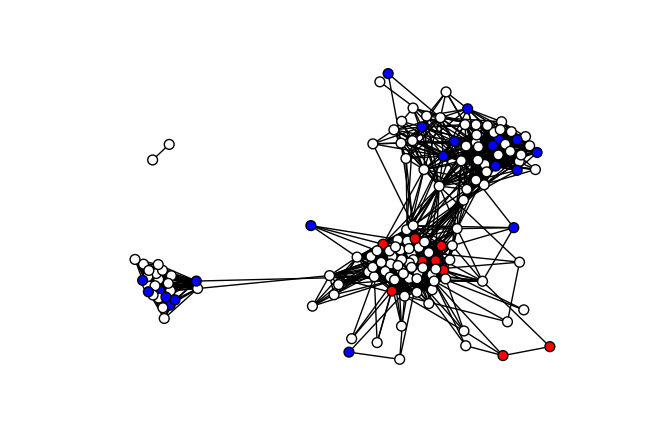

In [7]:
# on sélectionne 20% des noeuds pour lesquels on a accès à l'étiquette

random.seed(5)
proportion_nodes = 0.2
labeled_nodes = random.sample(G_fb.nodes(), int(proportion_nodes * G_fb.number_of_nodes()))

known_labels = np.zeros(n)
known_labels[labeled_nodes] = labels[labeled_nodes]

nx.draw(G_fb, cmap = plt.get_cmap('bwr'), nodelist=range(n), node_color = known_labels, node_size=50, pos=pos)

On va maintenant appliquer la propagation de label et voir les résultats

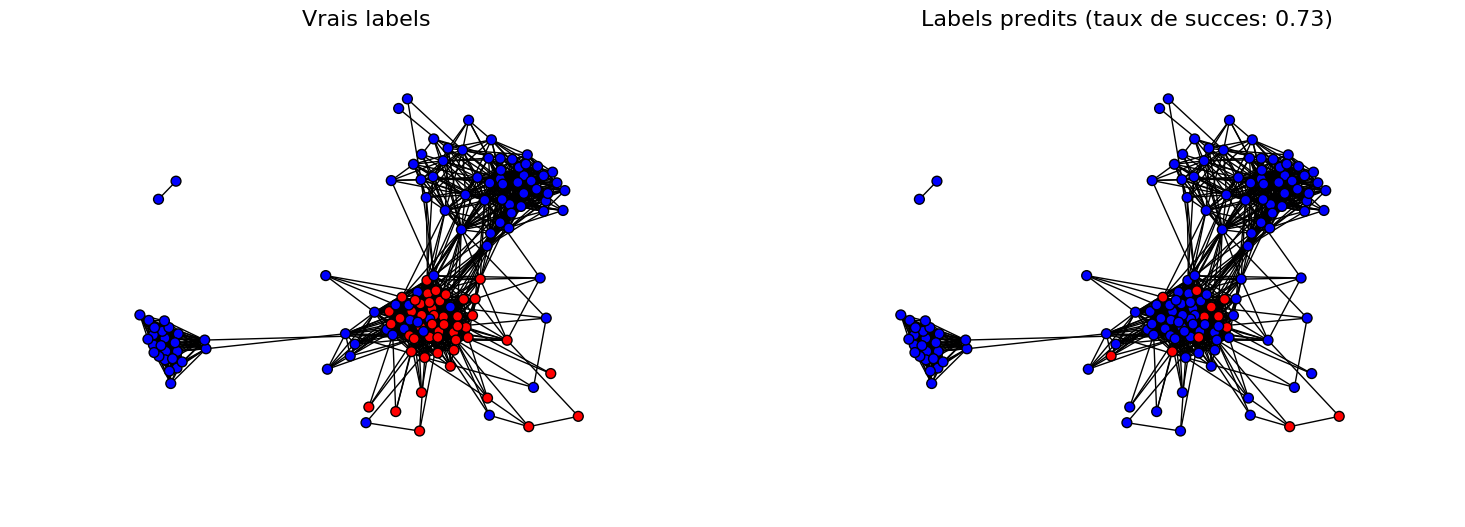

In [9]:
alpha = 0.7
L_sym = nx.normalized_laplacian_matrix(G_fb)

# on calcule la matrice de labels initiale
Y = np.zeros((n,2))
Y[known_labels==-1, 0] = 1
Y[known_labels==1, 1] = 1
I = np.eye(n,n)

# labels prédits à mettre dans F_pred pour affichage ci-dessous
F = np.dot(np.linalg.inv((1 - alpha) * I + L_sym),Y)
F_pred = np.argmax(F, axis=1)
F_pred[F_pred == 0] = -1
F_pred = [int(f) for f in F_pred]
pred = np.sum(F_pred == labels) / len(F_pred)

plt.figure(figsize=(18, 6))
f, axarr = plt.subplots(1, 2, num=1)
plt.sca(axarr[0])
nx.draw(G_fb, cmap = plt.get_cmap('bwr'), nodelist=range(n), node_color = labels, node_size=50, pos=pos)
axarr[0].set_title('Vrais labels', size=16)
plt.sca(axarr[1])
nx.draw(G_fb, cmap = plt.get_cmap('bwr'), nodelist=range(n), node_color = F_pred, node_size=50, pos=pos)
axarr[1].set_title('Labels predits (taux de succes: %.2f)' % pred, size=16)